In [1]:
import pandas as pd

df = pd.read_csv("../data/The_Cancer_data_1500_V2.csv")

## Model with No Tuning

### Training the Model using Logistic Regression

In [2]:
#Original model metrics
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

X = df.iloc[:, :8] 
y = df.iloc[:, 8] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = LogisticRegression()
model.fit(X_train, y_train)
y_hat = model.predict(X_test)

accuracy = accuracy_score(y_test, y_hat)
precision = precision_score(y_test, y_hat)
recall = recall_score(y_test, y_hat)
f1 = f1_score(y_test, y_hat)


print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Accuracy: 0.8633333333333333
Precision: 0.8712871287128713
Recall: 0.7586206896551724
F1 Score: 0.8110599078341013


/Users/deivadham/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


<Figure size 1000x500 with 0 Axes>

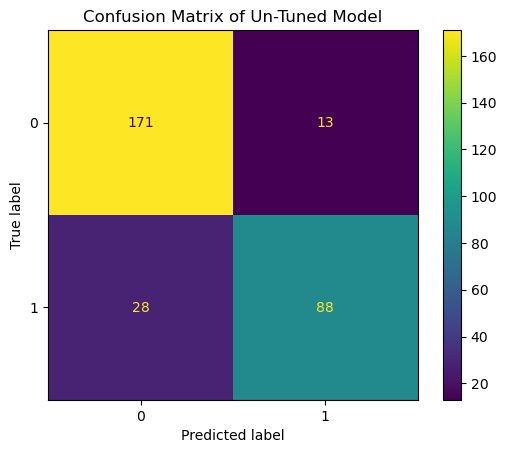

In [3]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)
plt.title("Confusion Matrix of Un-Tuned Model")
plt.show()

### Evaluation - Plotting ROC Curve 

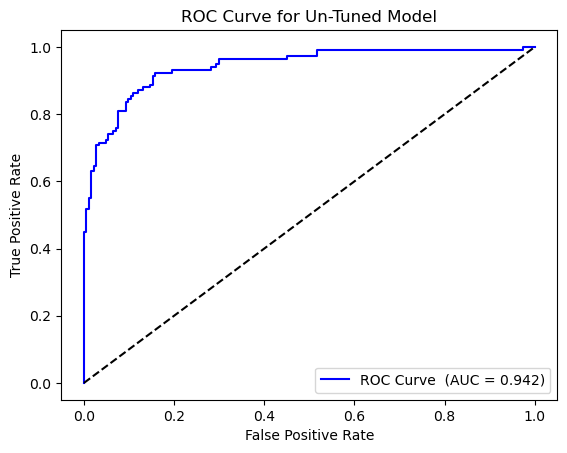

In [4]:
# ROC Curve for tuned model
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

y_hat = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_hat)
auc = roc_auc_score(y_test, y_hat)

plt.plot(fpr, tpr, label=f"ROC Curve  (AUC = {auc:.3f})", color='blue')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Un-Tuned Model")
plt.legend()
plt.show()

### Evaluation - Plotting Precision Recall Curve

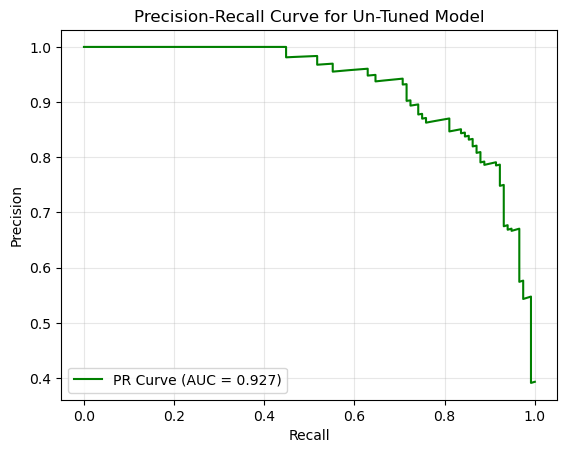

In [5]:

from sklearn.metrics import precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt

precision, recall, _ = precision_recall_curve(y_test, y_hat)
pr_auc = average_precision_score(y_test, y_hat)


plt.plot(recall, precision, label=f"PR Curve (AUC = {pr_auc:.3f})", color='green')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve for Un-Tuned Model")
plt.legend(loc="lower left")
plt.grid(alpha=0.3)

## Model with Tuning

### Tuning Model with Class weights

In [6]:
# Logistic Regression Tuning with Class Weights ()
# This would be the better model because recall is higher, which is key in medical diagnosis
# The class weight helps balance imbalanced datasets

best_model = LogisticRegression(class_weight="balanced")
best_model.fit(X_train, y_train)

best_y_hat = best_model.predict(X_test)


best_accuracy = accuracy_score(y_test, best_y_hat)
best_precision = precision_score(y_test, best_y_hat)
best_recall = recall_score(y_test, best_y_hat)
best_f1 = f1_score(y_test, best_y_hat)


print("Best Accuracy:", best_accuracy)
print("Best Precision:", best_precision)
print("Best Recall:", best_recall)
print("Best F1 Score:", best_f1)


Best Accuracy: 0.8766666666666667
Best Precision: 0.816
Best Recall: 0.8793103448275862
Best F1 Score: 0.8464730290456431


/Users/deivadham/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


<Figure size 1000x500 with 0 Axes>

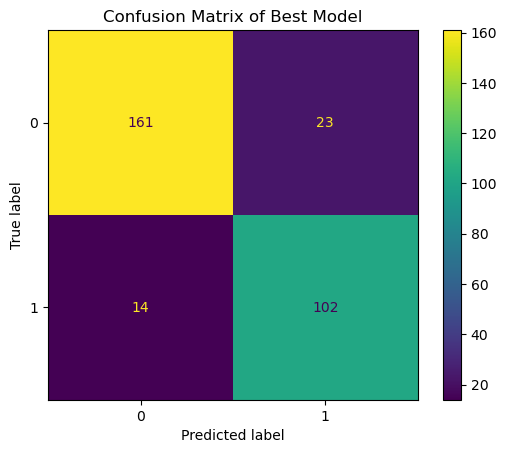

In [7]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
ConfusionMatrixDisplay.from_estimator(best_model, X_test, y_test)
plt.title("Confusion Matrix of Best Model")
plt.show()

### Evaluation - Plotting ROC Curve 

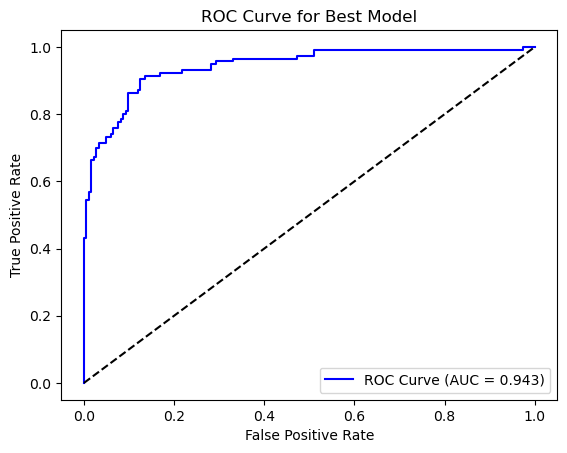

In [8]:
# ROC Curve for tuned model
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

best_y_hat = best_model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, best_y_hat)
auc = roc_auc_score(y_test, best_y_hat)

plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {auc:.3f})", color='blue')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Best Model")
plt.legend()
plt.show()

### Evaluation - Plotting Precision Recall Curve 

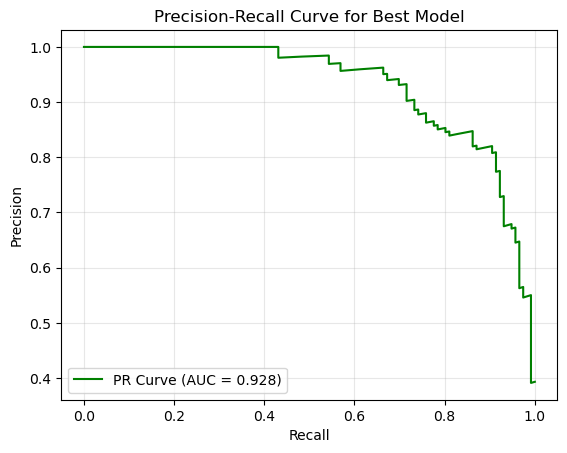

In [9]:

from sklearn.metrics import precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt

precision, recall, _ = precision_recall_curve(y_test, best_y_hat)
pr_auc = average_precision_score(y_test, best_y_hat)


plt.plot(recall, precision, label=f"PR Curve (AUC = {pr_auc:.3f})", color='green')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve for Best Model")
plt.legend(loc="lower left")
plt.grid(alpha=0.3)
